In [2]:
options(repr.plot.width=4, repr.plot.height=3)
require(pheatmap)
require(data.table)
require(tidyverse)

## 1. load data

In [3]:
dat.pro_ps.wd<- fread("../dat/1901/alpha_beta.promoter.long_100bin_transcripts_ps_smoothed_dy.txt")%>%
    group_by(celltype)%>%spread(key = bin,value = percent_open)
dat.pro_ps.raw <- fread("../dat/1901/alpha_beta.promoter.long_100bin_transcripts_ps_raw_dy.txt")

head(dat.pro_ps.wd)
tail(dat.pro_ps.wd)
dim(dat.pro_ps.wd)
table(dat.pro_ps.wd$celltype)

gene_tr.idx,celltype,1,2,3,4,5,6,7,8,⋯,91,92,93,94,95,96,97,98,99,100
AAAS_28691,alpha,4.931862,5.279896,5.615049,5.937014,6.245485,6.540155,6.820720,7.086871,⋯,9.029019,9.411283,9.808789,10.22147,10.64927,11.09211,11.54993,12.02267,12.51026,13.01264
AAED1_127544,alpha,7.403185,7.951997,8.479571,8.985074,9.467674,9.926540,10.360838,10.769737,⋯,19.584405,20.179108,20.785223,21.40308,22.03302,22.67537,23.33046,23.99862,24.68020,25.37551
AAGAB_42733,alpha,3.864166,4.456874,5.031414,5.587616,6.125312,6.644332,7.144508,7.625671,⋯,20.241210,21.036159,21.855849,22.70039,23.56989,24.46446,25.38421,26.32924,27.29968,28.29562
AAMDC_22628,alpha,12.633671,13.011864,13.374943,13.722367,14.053593,14.368079,14.665283,14.944664,⋯,30.946721,32.434447,33.976189,35.57119,37.21869,38.91794,40.66818,42.46864,44.31858,46.21724
AAMP_80793,alpha,24.453963,24.010923,23.577695,23.154637,22.742109,22.340468,21.950074,21.571287,⋯,18.184864,18.748109,19.334831,19.94480,20.57780,21.23358,21.91194,22.61263,23.33543,24.08012
AASDHPPT_23418,alpha,50.059457,49.249510,48.454370,47.674779,46.911476,46.165201,45.436695,44.726698,⋯,42.583230,44.544440,46.589766,48.71784,50.92729,53.21676,55.58487,58.03025,60.55154,63.14737


gene_tr.idx,celltype,1,2,3,4,5,6,7,8,⋯,91,92,93,94,95,96,97,98,99,100
ZSWIM8_14081,alpha,5.310967,5.699959,6.074699,6.434845,6.780055,7.109988,7.424301,7.722653,⋯,12.82396,13.16084,13.50228,13.84875,14.20070,14.55859,14.92286,15.29399,15.67241,16.05860
ZUFSP_112980,alpha,2.099763,2.438252,2.765211,3.080644,3.384554,3.676944,3.957819,4.227180,⋯,11.72306,12.53383,13.37696,14.25206,15.15875,16.09663,17.06533,18.06445,19.09361,20.15241
ZXDC_94748,alpha,8.506410,9.089628,9.653701,10.198114,10.722354,11.225909,11.708265,12.168908,⋯,20.73449,21.34025,21.96678,22.61400,23.28182,23.97015,24.67890,25.40801,26.15737,26.92690
ZYX_119844,alpha,25.661146,25.289388,24.922469,24.560689,24.204347,23.853740,23.509167,23.170928,⋯,29.49011,30.82080,32.20004,33.62727,35.10195,36.62352,38.19145,39.80519,41.46418,43.16788
ZZEF1_52568,alpha,2.762239,3.213540,3.648379,4.066344,4.467028,4.850022,5.214915,5.561301,⋯,16.55262,17.52582,18.53330,19.57470,20.64968,21.75790,22.89900,24.07264,25.27848,26.51617
ZZZ3_5178,alpha,12.659186,13.067399,13.461382,13.840516,14.204182,14.551759,14.882628,15.196170,⋯,34.54294,36.05516,37.62459,39.25023,40.93107,42.66612,44.45436,46.29479,48.18640,50.12820


[1] 6397  102


alpha  beta 
 5450   947 

## 2. updated cluster 
[QuickR](https://www.statmethods.net/advstats/cluster.html) introduces the following methods categories:
1. Partitioning based methods or Centroid-based clustering: `kmeans`, `pam`
2. Hierarchical Agglomerative: `hclust`, `pvclust`
3. Model based: `mclust`
4. Density-based: [`DBSCAN`](https://en.wikipedia.org/wiki/DBSCAN)

More complete intro can be found [cluster analysis@WIKI](https://en.wikipedia.org/wiki/Cluster_analysis)
Also they introduced:
1. cluster compare: `fpc::cluster.stats`

Because the goal is to find dynamical patterns, I would like to choose 1. (i.e. kmeans or pam)


In [4]:
require(fpc)
dat.sub <- dat.pro_ps.wd%>%
    as.data.frame()%>%
    filter(celltype=='beta')%>%
    column_to_rownames("gene_tr.idx")%>%
    select(-celltype)

Loading required package: fpc


### 2.2 filter bottom < 5% 

tr.keep
FALSE  TRUE 
   18   929 

2  clusters  0.3511433 
3  clusters  0.3925851 
4  clusters  0.3421246 
5  clusters  0.3030317 
6  clusters  0.3032109 
7  clusters  0.3000273 
8  clusters  0.2929974 
9  clusters  0.2759007 
10  clusters  0.2636012 



  1   2   3 
222 285 422 

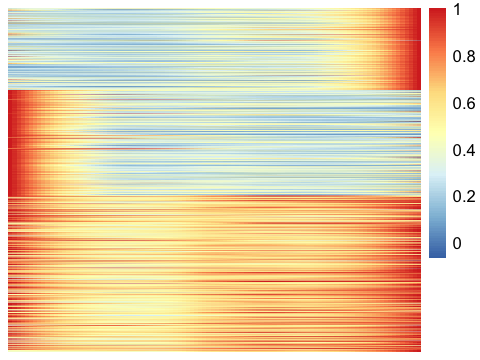

In [5]:
tr.keep <- apply(dat.sub,1,max)>=5
table(tr.keep)
dat.sub.2 <- dat.sub[tr.keep,]
dat.sub.2.scale <- t(apply(dat.sub.2,1,function(x) x/max(x)))
pk.scale<- pamk(dat.sub.2.scale,critout=T)
table(pk.scale$pamobject$clustering)
                           
pheatmap(dat.sub.2.scale[order(pk.scale$pamobject$clustering),],
         scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)
                           

### kmeans give similar results 

In [26]:
tr.keep <- apply(dat.sub,1,max)>=5
table(tr.keep)
dat.sub.2 <- dat.sub[tr.keep,]
dat.sub.2.scale <- t(apply(dat.sub.2,1,function(x) x/max(x)))
pka <- kmeansruns(dat.sub.2.scale,critout=T,criterion="asw")
pkc <- kmeansruns(dat.sub.2.scale,critout=T,criterion="ch")
                           

tr.keep
FALSE  TRUE 
   18   929 

2  clusters  0.3458622 
3  clusters  0.3915704 
4  clusters  0.3464172 
5  clusters  0.3209645 
6  clusters  0.3306977 
7  clusters  0.3051041 
8  clusters  0.3020694 
9  clusters  0.2834526 
10  clusters  0.2851828 
2  clusters  587.0702 
3  clusters  681.8244 
4  clusters  632.7186 
5  clusters  594.171 
6  clusters  573.8791 
7  clusters  563.4881 
8  clusters  547.3622 
9  clusters  522.0562 
10  clusters  502.6032 


In [29]:
pka$bestk
pkc$bestk

[1] 3

[1] 3


  1   2   3 
420 231 278 

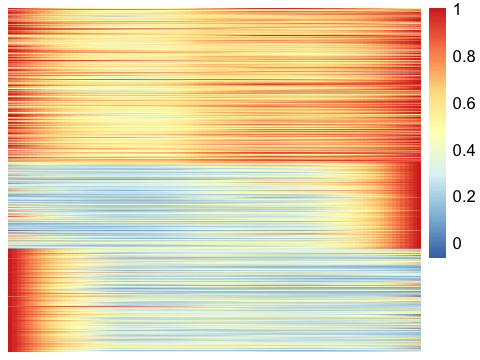

In [31]:
table(pka$cluster)                          
pheatmap(dat.sub.2.scale[order(pka$cluster),],
         scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)


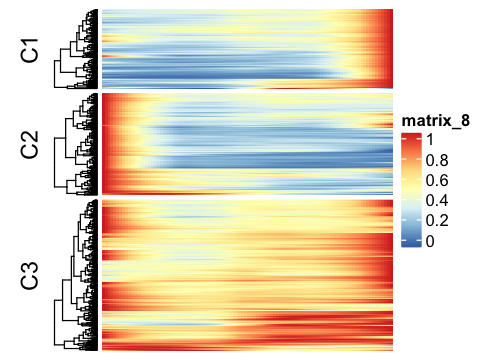

In [23]:
require(ComplexHeatmap)
require(RColorBrewer)
require(circlize)
Heatmap(dat.sub.2.scale,
        col=colorRamp2(seq(0,1,length.out = 99),colorRampPalette(rev(brewer.pal(n = 7, name =
    "RdYlBu")))(99)),
        cluster_columns=F,
        split = paste0("C",pk.scale$pamobject$clustering),
       show_row_names=F,show_column_names=F)

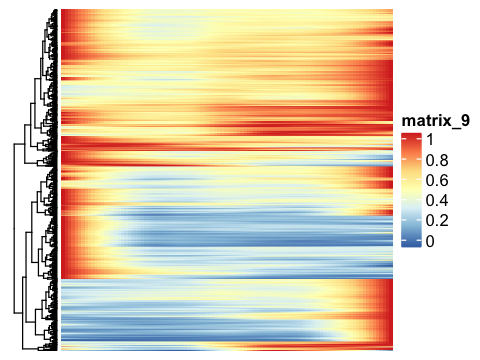

In [24]:
Heatmap(dat.sub.2.scale,
        col=colorRamp2(seq(0,1,length.out = 99),colorRampPalette(rev(brewer.pal(n = 7, name =
    "RdYlBu")))(99)),
        cluster_columns=F,
       show_row_names=F,show_column_names=F)

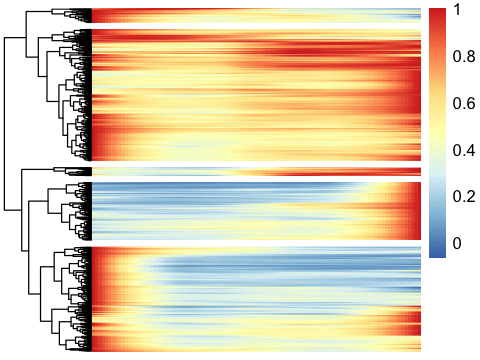

In [34]:
pheatmap(dat.sub.2.scale,cutree_rows = 5,
         scale="none",cluster_rows = T,cluster_cols = F,
         show_rownames = F,show_colnames = F)


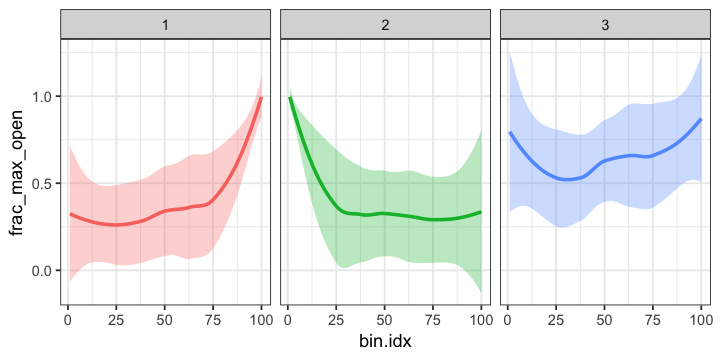

In [41]:
options(repr.plot.width=6, repr.plot.height=3)

ggplot(data.frame(dat.sub.2.scale,clust=pk.scale$pamobject$clustering)%>%
        rownames_to_column("gene.tr")%>%
        gather(key = "bin.idx",value = 'frac_max_open',2:101)%>%
        mutate(bin.idx=as.numeric(sub("X","",bin.idx))),
       aes(bin.idx,frac_max_open,group=clust,color=as.factor(clust)))+
    stat_summary(fun.data = 'mean_sdl', geom = 'smooth',se=T,aes(fill=as.factor(clust)),
                 alpha=0.3)+
facet_wrap(~clust)+theme_bw()+theme(legend.position = "none")

In [46]:
pk.list<-sapply(unique(pk.scale$pamobject$clustering),function(x)
        unique(unlist(sapply(names(which(pk.scale$pamobject$clustering==x)), function(y) 
            unlist(strsplit(y,split = "_"))[1]))))
str(pk.list)

## go enrich                             
require(enrichR)
dbs <- listEnrichrDbs()                 
pk.list.gene.enrichr <- lapply(pk.list,function(x) 
    enrichr(x, c("GO_Biological_Process_2018"))$GO_Biological_Process_2018)
                             

List of 3
 $ : chr [1:218] "ABCB6" "ABCB9" "ABHD15" "ABHD2" ...
 $ : chr [1:281] "ABCC8" "ACSL1" "ADAMTS19" "ADAMTS5" ...
 $ : chr [1:416] "ABHD14A" "ABHD14A-ACY1" "ABHD14B" "ABLIM2" ...


Loading required package: enrichR


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.


In [47]:
head(pk.list.gene.enrichr[[1]]%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[2]]%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[3]]%>%arrange(Adjusted.P.value))

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
chordate embryonic development (GO:0043009),6/57,3.573326e-05,0.05663722,7.594066e-05,0.1203659,-1.458653,14.935768,FLCN;LIG4;SULF1;GRHL2;FGFR1;VEGFA
positive regulation of endothelial cell chemotaxis (GO:2001028),3/14,4.254673e-04,0.22478857,8.581735e-04,0.4091010,-2.460108,19.096154,MET;FGFR1;VEGFA
"regulation of retrograde protein transport, ER to cytosol (GO:1904152)",3/13,3.369994e-04,0.22478857,7.126241e-04,0.4091010,-2.118448,16.937905,EDEM1;DERL2;UBAC2
axonal transport (GO:0098930),4/37,6.840246e-04,0.27104476,1.150544e-03,0.4091010,-1.572073,11.456509,BLOC1S3;KIF1B;AP3S2;PAFAH1B1
neuron migration (GO:0001764),4/41,1.013787e-03,0.29949187,1.634522e-03,0.4091010,-1.614923,11.133380,NHSL1;FGFR1;PAFAH1B1;VEGFA
positive regulation of cellular component organization (GO:0051130),6/107,1.133723e-03,0.29949187,1.776846e-03,0.4091010,-1.170154,7.936278,PPP1R15A;NEDD4L;ASAP1;FNIP2;IGF1R;VEGFA


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of protein secretion (GO:0050708),8/108,0.0001437879,0.2401258,0.0002177761,0.3636861,-1.270394,11.239389,MYOM1;G6PC2;RSAD2;ABCC8;STX1A;GCK;SYT7;INS
regulation of peptide hormone secretion (GO:0090276),6/74,0.0006069587,0.3055352,0.0008687997,0.4485129,-1.842008,13.643844,G6PC2;ABCC8;STX1A;GCK;SYT7;INS
wound healing (GO:0042060),5/51,0.0007318207,0.3055352,0.0010742824,0.4485129,-1.578328,11.395491,COL3A1;SMAD3;FGF2;SYT7;INS
adenylate cyclase-modulating G-protein coupled receptor signaling pathway (GO:0007188),8/135,0.0006537419,0.3055352,0.0008852212,0.4485129,-1.309216,9.600217,PTGER4;GPR37;LTB4R2;HTR1E;GRM8;HTR1B;LTB4R;RXFP3
positive regulation of DNA replication (GO:0045740),4/36,0.0015770964,0.3801396,0.0022610624,0.4863041,-2.177527,14.049776,BMP4;KITLG;PDGFC;INS
regulation of tissue remodeling (GO:0034103),3/18,0.0019150333,0.3801396,0.0029482506,0.4863041,-2.122598,13.283263,IL15;HAND2;SYT7


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of transcription from RNA polymerase II promoter (GO:0006357),64/1479,1.690711e-08,3.665462e-05,1.840007e-07,0.0003989136,-1.378054,24.66101,THRB;ZNF174;VLDLR;ENO1;NR3C1;ETS1;DCAF6;PPP3CA;EPM2AIP1;NIPBL;HEY1;SIN3A;EP300;EPC2;KAT7;ZNF367;NCOA1;KLF10;ACTL6A;RFX2;ABHD14B;ETV1;PROX1;SREBF2;PPM1A;SFPQ;PAX8;DDIT3;TRIB3;MAML3;ZFPM1;SQSTM1;ATF3;CGGBP1;RHOQ;NFAT5;SRF;GLIS3;ZBTB4;TOB1;NEUROD1;DLL4;MNT;NFIL3;MEF2D;ZBED4;PLK3;NR1H2;HMGA1;NR0B2;ST18;ACVR2A;FOSL2;BMP5;KLF6;KLF5;SP2;TEF;YEATS2;BHLHE40;KLF9;QRICH1;CDK13;TAF2
positive regulation of transcription from RNA polymerase II promoter (GO:0045944),39/849,3.370156e-06,2.435500e-03,1.804354e-05,0.0130394675,-1.895121,23.87957,NFAT5;THRB;SRF;GLIS3;NR3C1;ETS1;DCAF6;NEUROD1;PPP3CA;NIPBL;HEY1;SIN3A;EP300;KAT7;MEF2D;NCOA1;KLF10;NR1H2;HMGA1;ABHD14B;ETV1;PROX1;ST18;ACVR2A;SREBF2;FOSL2;BMP5;SFPQ;KLF6;KLF5;PAX8;DDIT3;MAML3;CDK13;ZFPM1;SQSTM1;ATF3;TAF2;RHOQ
negative regulation of transcription from RNA polymerase II promoter (GO:0000122),30/566,3.050051e-06,2.435500e-03,1.470286e-05,0.0130394675,-1.086882,13.80378,ZNF174;SRF;GLIS3;VLDLR;ENO1;NR3C1;ZBTB4;DLL4;MNT;NIPBL;HEY1;NFIL3;SIN3A;EP300;KLF10;PLK3;NR1H2;PROX1;NR0B2;SREBF2;PPM1A;SFPQ;SP2;YEATS2;DDIT3;BHLHE40;TRIB3;ZFPM1;ATF3;CGGBP1
peptidyl-threonine dephosphorylation (GO:0035970),5/17,1.913347e-05,1.037034e-02,8.787219e-05,0.0476267280,-2.234693,24.27786,DUSP4;PPM1A;DUSP5;DUSP18;PPM1D
"positive regulation of transcription, DNA-templated (GO:0045893)",44/1121,4.024062e-05,1.744833e-02,1.829487e-04,0.0790694904,-1.709566,17.30189,NFAT5;THRB;SRF;GLIS3;NR3C1;ETS1;DCAF6;NEUROD1;PPP3CA;HEY1;SIN3A;EP300;KAT8;KAT7;MEF2D;ATXN7L3;NCOA1;KLF10;TAF15;NR1H2;HMGA1;ABHD14B;ETV1;PROX1;ST18;ACVR2A;TGFBR1;SREBF2;FOSL2;BMP5;PPM1A;SFPQ;KLF6;KLF5;PAX8;DDIT3;CAMK4;MAML3;CDK13;SQSTM1;ATF3;TAF2;RHOQ;RNF187
response to endoplasmic reticulum stress (GO:0034976),10/107,7.938768e-05,2.868541e-02,2.188270e-04,0.0790694904,-1.258902,11.88551,SCAMP5;UFL1;HSPA5;DDIT3;SEL1L;ATP2A2;DNAJB9;TRIB3;CHAC1;ATF3


### Subclustering 

2  clusters  0.4075191 
3  clusters  0.2682578 
4  clusters  0.2889981 
5  clusters  0.2876132 
6  clusters  0.2808736 
7  clusters  0.2724019 
8  clusters  0.2656176 
9  clusters  0.270638 
10  clusters  0.2627979 

  1   2 
137  85 
2  clusters  0.352223 
3  clusters  0.2769394 
4  clusters  0.282748 
5  clusters  0.2596493 
6  clusters  0.2760953 
7  clusters  0.2398256 
8  clusters  0.2414087 
9  clusters  0.2309662 
10  clusters  0.2353238 

  1   2 
199  86 


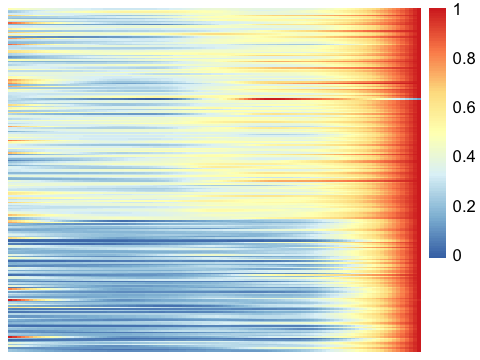

2  clusters  0.3232162 
3  clusters  0.2737993 
4  clusters  0.267311 
5  clusters  0.2541791 
6  clusters  0.2110524 
7  clusters  0.1983619 
8  clusters  0.1994799 
9  clusters  0.1990485 
10  clusters  0.2188235 

  1   2 
 91 331 


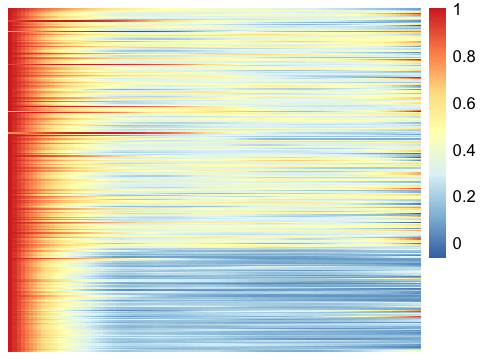

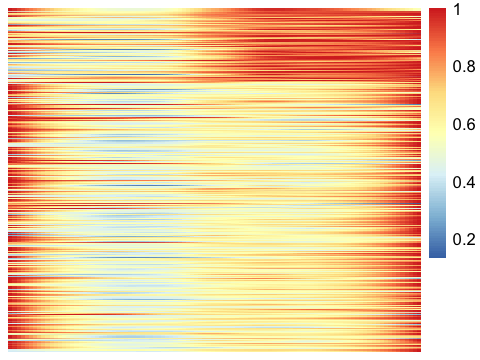

In [6]:
pk.scale.2 <- list()
for(i in 1:3){
    #cat(paste0("For Cluster ",i,"\n"))
    dat.sub.2.scale.1 <- dat.sub.2.scale[pk.scale$pamobject$clustering==i,]
    pk.scale.2[[i]]<- pamk(dat.sub.2.scale.1,critout=T)
    print(table(pk.scale.2[[i]]$pamobject$clustering))
    pheatmap(dat.sub.2.scale.1[order(pk.scale.2[[i]]$pamobject$clustering),],
         border_color = NA,scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)
}


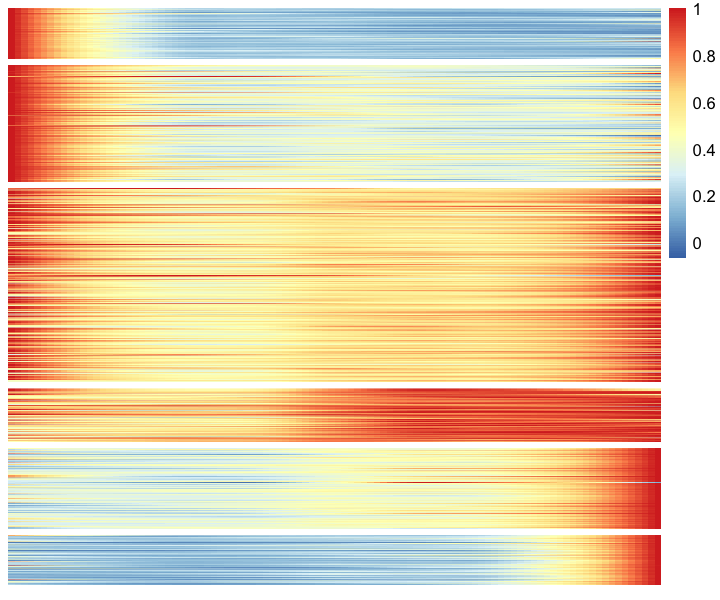

In [7]:
# 
a=(pk.scale.2[[1]]$pamobject$clustering)
b1=ifelse(a==1,5,6)
names(b1)=names(a)

a=(pk.scale.2[[2]]$pamobject$clustering)
b2=ifelse(a==1,2,1)
names(b2)=names(a)

a=(pk.scale.2[[3]]$pamobject$clustering)
b3=ifelse(a==1,4,3)
names(b3)=names(a)



final.ord = c(b1,b2,b3)


options(repr.plot.width=6, repr.plot.height=5)

pheatmap(dat.sub.2.scale[names(final.ord)[order(final.ord)],],
         gaps_row = as.numeric(cumsum(table(final.ord))),
         scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)

In [8]:
table(final.ord)

final.ord
  1   2   3   4   5   6 
 86 199 331  91 137  85 

In [9]:
pk.list<-sapply(1:6,function(x)
        unique(unlist(sapply(names(which(final.ord==x)), function(y) 
            unlist(strsplit(y,split = "_"))[1]))))
str(pk.list)

## go enrich                             
require(enrichR)
dbs <- listEnrichrDbs()                 
pk.list.gene.enrichr <- lapply(pk.list,function(x) 
    enrichr(x, c("GO_Biological_Process_2018"))$GO_Biological_Process_2018)
                             

List of 6
 $ : chr [1:86] "ADAMTS19" "ARAP2" "ARHGAP26" "ATP11C" ...
 $ : chr [1:197] "ABCC8" "ACSL1" "ADAMTS5" "AK2" ...
 $ : chr [1:328] "ABLIM2" "AC020922.1" "ACTL6A" "ACTR1A" ...
 $ : chr [1:91] "ABHD14A" "ABHD14A-ACY1" "ABHD14B" "ACY1" ...
 $ : chr [1:135] "ABCB6" "ABCB9" "ABHD15" "ABHD5" ...
 $ : chr [1:84] "ABHD2" "AC018867.1" "AC092675.3" "ADCK4" ...


Loading required package: enrichR


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.


In [10]:
head(pk.list.gene.enrichr[[1]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[2]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[3]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[4]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[5]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))

head(pk.list.gene.enrichr[[6]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))



Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
response to hexose (GO:0009746),3/28,3,28,0.0002326663,0.09115825,0.0003377031,0.1166676,-1.910545,15.98344,SLC30A8;INS-IGF2;INS
positive regulation of insulin receptor signaling pathway (GO:0046628),2/8,2,8,0.0005031944,0.11321873,0.0008439095,0.1610271,-1.974588,14.99607,INS-IGF2;INS
oligodendrocyte differentiation (GO:0048709),2/15,2,15,0.0018504026,0.12822233,0.0025001748,0.1610271,-2.484839,15.63548,PRDM8;PTPRZ1
detection of calcium ion (GO:0005513),2/14,2,14,0.0016081686,0.12822233,0.0022123180,0.1610271,-2.206610,14.19437,CASR;SYT1
positive regulation of vascular smooth muscle cell proliferation (GO:1904707),2/15,2,15,0.0018504026,0.12822233,0.0025001748,0.1610271,-2.203333,13.86415,HTR1B;FGF2
response to glucose (GO:0009749),3/48,3,48,0.0011545546,0.12822233,0.0014692474,0.1610271,-1.724641,11.66554,SLC30A8;INS-IGF2;INS


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of peptide hormone secretion (GO:0090276),5/74,5,74,0.0008186752,0.3604900,0.0010339928,0.447799,-1.840800,13.084078,G6PC2;ABCC8;STX1A;GCK;SYT7
neuropeptide signaling pathway (GO:0007218),5/71,5,71,0.0006776146,0.3604900,0.0008675737,0.447799,-1.290938,9.419890,GLRB;LTB4R2;SSTR1;LTB4R;RXFP3
positive regulation of synapse assembly (GO:0051965),3/27,3,27,0.0023128178,0.3941168,0.0030318687,0.447799,-1.608114,9.760111,PTPRD;BDNF;VSTM5
regulation of insulin secretion (GO:0050796),5/99,5,99,0.0029834733,0.3941168,0.0034768091,0.447799,-1.292397,7.514855,G6PC2;ABCC8;STX1A;GCK;SYT7
negative regulation of cell motility (GO:2000146),5/98,5,98,0.0028551985,0.3941168,0.0033353073,0.447799,-1.234966,7.235186,MCTP1;SPOCK3;ARAP3;PTPRK;ARID2
phospholipid scrambling (GO:0017121),2/9,2,9,0.0033205218,0.3987645,0.0048937922,0.447799,-3.016721,17.218336,PLSCR2;PLSCR4


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
interleukin-6-mediated signaling pathway (GO:0070102),4/15,4,15,8.404182e-05,0.03249057,0.0002522798,0.09753137,-1.761297,16.52836,FER;JAK2;IL6R;ST18
peptidyl-threonine dephosphorylation (GO:0035970),4/17,4,17,1.427823e-04,0.04599970,0.0003793389,0.12221034,-2.232962,19.77106,DUSP4;PPM1A;DUSP5;DUSP18
heart trabecula morphogenesis (GO:0061384),4/19,4,19,2.265833e-04,0.06256937,0.0005465486,0.15067524,-1.954551,16.40337,DLL4;HEY1;TGFBR1;BMP5
cytoskeletal anchoring at plasma membrane (GO:0007016),3/10,3,10,4.815043e-04,0.07034699,0.0012015944,0.15067524,-2.355883,17.99563,SPTBN4;EPB41L3;ANK3
cell morphogenesis (GO:0000902),6/60,6,60,4.418106e-04,0.07034699,0.0008519331,0.15067524,-2.071226,15.99946,NCKAP1;CDH2;SHROOM3;FRY;CLU;CDH18
cellular response to interleukin-6 (GO:0071354),4/24,4,24,5.822824e-04,0.07034699,0.0011828015,0.15067524,-2.002702,14.91724,FER;JAK2;IL6R;ST18


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
carbohydrate derivative transport (GO:1901264),2/13,2,13,0.0015458562,0.1520744,0.002513992,0.2546087,-2.674647,17.31079,SLC25A19;VLDLR
negative regulation of kinase activity (GO:0033673),4/92,4,92,0.0008256324,0.1520744,0.001382816,0.2546087,-1.434806,10.18620,SOCS2;AKT1S1;TRIB3;CEP85
positive regulation of cholesterol storage (GO:0010886),1/7,1,7,0.0314231790,0.2365793,0.039566574,0.2729991,-3.791709,13.12011,SREBF2
positive regulation of RNA splicing (GO:0033120),2/23,2,23,0.0048680827,0.2365793,0.006953275,0.2729991,-2.210696,11.77208,POLR2A;U2AF2
regulation of protein depolymerization (GO:1901879),1/7,1,7,0.0314231790,0.2365793,0.039566574,0.2729991,-3.288450,11.37873,WDR1
thiamine-containing compound metabolic process (GO:0042723),1/8,1,8,0.0358317465,0.2365793,0.044402526,0.2729991,-3.361504,11.19018,SLC25A19


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
positive regulation of endothelial cell chemotaxis (GO:2001028),3/14,3,14,0.0001036793,0.06519431,0.0002312714,0.1201103,-2.461744,22.58456,MET;FGFR1;VEGFA
axonal transport (GO:0098930),4/37,4,37,0.0001103119,0.06519431,0.0002118408,0.1201103,-1.573174,14.33508,BLOC1S3;KIF1B;AP3S2;PAFAH1B1
neuron migration (GO:0001764),4/41,4,41,0.0001656503,0.06526622,0.0003048485,0.1201103,-1.616002,14.06832,NHSL1;FGFR1;PAFAH1B1;VEGFA
chordate embryonic development (GO:0043009),4/57,4,57,0.0005944367,0.14052484,0.0009773960,0.2310564,-1.455759,10.81322,SULF1;GRHL2;FGFR1;VEGFA
regulation of cell migration involved in sprouting angiogenesis (GO:0090049),3/31,3,31,0.0011772932,0.17972515,0.0018616789,0.2887002,-2.028518,13.68142,STARD13;HDAC9;VEGFA
vasculogenesis (GO:0001570),3/33,3,33,0.0014149957,0.17972515,0.0021982245,0.2887002,-2.054037,13.47578,ADM;TGFBR2;VEGFA


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of ATP biosynthetic process (GO:2001169),2/9,2,9,0.0006156126,0.1885537,0.0009049982,0.2393309,-2.634775,19.47861,FLCN;PPARGC1A
B cell activation involved in immune response (GO:0002312),2/14,2,14,0.0015350366,0.1885537,0.0019484196,0.2393309,-2.561792,16.59836,GPR183;LIG4
regulation of catabolic process (GO:0009894),2/13,2,13,0.0013193401,0.1885537,0.0017094115,0.2393309,-2.451965,16.25806,ITGB1;NEDD4L
regulation of lamellipodium morphogenesis (GO:2000392),2/12,2,12,0.0011194154,0.1885537,0.0014854401,0.2393309,-2.279153,15.48673,ENPP2;CD44
"regulation of retrograde protein transport, ER to cytosol (GO:1904152)",2/13,2,13,0.0013193401,0.1885537,0.0017094115,0.2393309,-2.115283,14.02564,EDEM1;UBAC2
regulation of energy homeostasis (GO:2000505),2/17,2,17,0.0022754330,0.2395706,0.0027544257,0.2661654,-2.403745,14.62819,FLCN;PPARGC1A
